# Project: Investigate a Dataset - [Soccer Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This is an analysis for a European soccer dataset which contains columns for:
<ul>
    <li>Country Id</li>
    <li>League Id</li>
    <li>Season</li>
    <li>Stage</li>
    <li>Date</li>
    <li>Match Api Id</li>
    <li>Home Team Api Id</li>
    <li>Away Team Api Id</li>
    <li>Home Team Goal</li>
    <li>Away Team Goal</li>
    <li>Player ids</li>
</ul>


### Question(s) for Analysis
<ul>
    <li>What is the league with the least and most total goals per match?
    <li>What is the league with the lowest and highest percentage of draws per game?
    <li>How does scoring home goals correlate to the scoring of the away goals?
    <li>Do home teams win more games than away teams?
    <li>Do later season matches have more or less goals?
</ul>

In [40]:
#Import Statements:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [41]:
#Adding a function to check the cleanliness of the dataset
def check(data):
    NaN = data.isnull().sum().sum()
    print(f"Number of NaN values: {NaN}")
    dupes = data.duplicated().sum()
    print(f"Number of duplicates: {dupes}")

<a id='wrangling'></a>
## Data Wrangling

In [42]:
df = pd.read_csv("Match.csv") #Reading the CSV file
df.tail() #Getting 5 rows from the end

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
25974,25975,Switzerland,Switzerland Super League,2015/2016,9,22/09/2015 0:00,1992091,FC St. Gallen,FC Thun,1,...,232110.0,289732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,Switzerland,Switzerland Super League,2015/2016,9,23/09/2015 0:00,1992092,FC Vaduz,FC Luzern,1,...,34082.0,95257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,Switzerland,Switzerland Super League,2015/2016,9,23/09/2015 0:00,1992093,Grasshopper Club Zürich,FC Sion,2,...,451335.0,275122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,Switzerland,Switzerland Super League,2015/2016,9,22/09/2015 0:00,1992094,Lugano,FC Zürich,0,...,92252.0,194532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,Switzerland,Switzerland Super League,2015/2016,9,23/09/2015 0:00,1992095,BSC Young Boys,FC Basel,4,...,41726.0,527103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.info() # to know the columns with NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 85 columns):
id                  25979 non-null int64
country_id          25979 non-null object
league_id           25979 non-null object
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null object
away_team_api_id    25979 non-null object
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
home_player_X1      24158 non-null float64
home_player_X2      24158 non-null float64
home_player_X3      24147 non-null float64
home_player_X4      24147 non-null float64
home_player_X5      24147 non-null float64
home_player_X6      24147 non-null float64
home_player_X7      24147 non-null float64
home_player_X8      24147 non-null float64
home_player_X9      24147 non-null float64
home_player_X10     24147 non-null float64
home


### Data Cleaning

#### Checking the cleanliness:

In [44]:
check(df) #Using the function "check"

Number of NaN values: 203935
Number of duplicates: 0


<h3> Removing columns with NaN values:</h3>
<h4> We see that a lot of the columns are full of missing values that we cannot replace, so, i decided to remove them.

In [45]:
df_cleaned = df.dropna(axis = 1) # Dropping NaN columns
df_cleaned = df_cleaned.copy() # Making it a distinct copy from the original df
df_cleaned.isnull().sum().sum() # to check for NaN values

0

In [46]:
check(df_cleaned) #Using the function "check" to make sure that the data is clean

Number of NaN values: 0
Number of duplicates: 0


#### Adding a total goals column

In [47]:
df_cleaned["total_goals"] = df_cleaned["home_team_goal"] + df_cleaned["away_team_goal"] #Sum of the goals of both teams

#### Adding a winner column:

In [48]:
df_cleaned["winner"] = ["Draw"] * 25979 #Making a column with one word "Draw"
df_cleaned.loc[df_cleaned["home_team_goal"] > df_cleaned["away_team_goal"] ,"winner"] = "Home" #Adding the "Home" result
df_cleaned.loc[df_cleaned["home_team_goal"] < df_cleaned["away_team_goal"] ,"winner"] = "Away" #Adding the "Away" result

In [49]:
df_cleaned.head() #Getting the first 5 rows

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,total_goals,winner
0,1,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492473,KRC Genk,Beerschot AC,1,1,2,Draw
1,2,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,0,Draw
2,3,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,3,Away
3,4,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492476,KAA Gent,RAEC Mons,5,0,5,Home
4,5,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492477,FCV Dender EH,Standard de Liège,1,3,4,Away


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What is the league with the least and most total goals per match?)

#### Firstly : Checking the number of games.

In [50]:
num = df_cleaned.groupby(["league_id"])["league_id"].count() #Counting the number of games of each league
num

league_id
Belgium Jupiler League      1728
England Premier League      3040
France Ligue 1              3040
Germany 1. Bundesliga       2448
Italy Serie A               3017
Netherlands Eredivisie      2448
Poland Ekstraklasa          1920
Portugal Liga ZON Sagres    2052
Scotland Premier League     1824
Spain LIGA BBVA             3040
Switzerland Super League    1422
Name: league_id, dtype: int64

#### Secondly: Getting the Goals

In [51]:
goals = df_cleaned.groupby(["league_id"])["total_goals"].sum() #Adding the goals for different leagues
goals

league_id
Belgium Jupiler League      4841
England Premier League      8240
France Ligue 1              7427
Germany 1. Bundesliga       7103
Italy Serie A               7895
Netherlands Eredivisie      7542
Poland Ekstraklasa          4656
Portugal Liga ZON Sagres    5201
Scotland Premier League     4804
Spain LIGA BBVA             8412
Switzerland Super League    4166
Name: total_goals, dtype: int64

#### Thirdly : Getting the mean

In [52]:
result1 = goals / num #Dividing the goals by the number of games
result1

league_id
Belgium Jupiler League      2.801505
England Premier League      2.710526
France Ligue 1              2.443092
Germany 1. Bundesliga       2.901552
Italy Serie A               2.616838
Netherlands Eredivisie      3.080882
Poland Ekstraklasa          2.425000
Portugal Liga ZON Sagres    2.534600
Scotland Premier League     2.633772
Spain LIGA BBVA             2.767105
Switzerland Super League    2.929677
dtype: float64

In [53]:
result1[result1 == np.max(result1)] #Getting the max value

league_id
Netherlands Eredivisie    3.080882
dtype: float64

In [54]:
result1[result1 == np.min(result1)] #Getting the min value

league_id
Poland Ekstraklasa    2.425
dtype: float64

#### Fourthly : Plotting

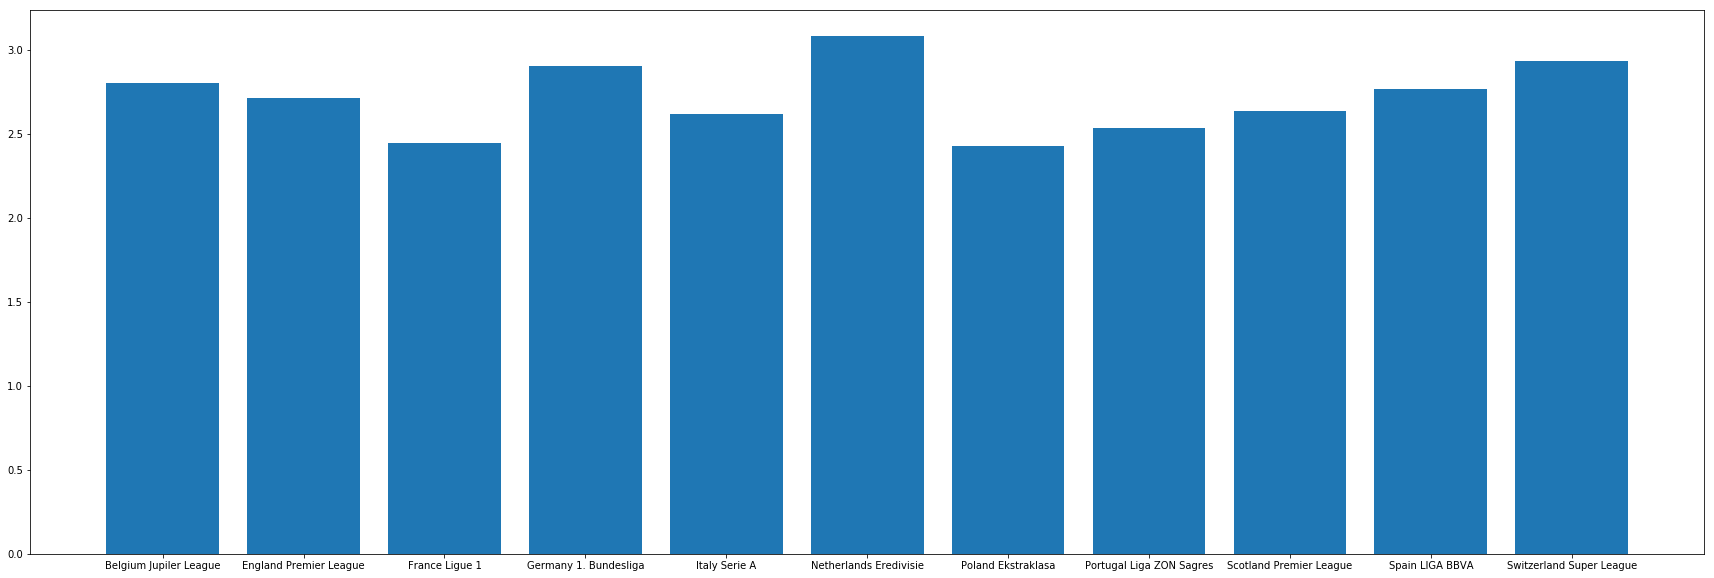

In [55]:
Leagues = result1.index #X-Axis
goal = result1.values #Y-Axis
plt.figure(figsize=(30, 10)) #Setting the size of the plot
plt.bar(Leagues, goal);

#### We can see that Poland Ekstraklasa has the least number of goals while Netherlands Eredivisie has the highest one.

### Research Question 2  (What is the league with the lowest and highest percentage of draws per game?)

#### Secondly : Checking the number of draws

In [56]:
 #Adding the number of draws for each league:
draw = df_cleaned.groupby(["league_id"])["winner"].apply(lambda x: (x == "Draw").sum())
draw

league_id
Belgium Jupiler League      425
England Premier League      783
France Ligue 1              859
Germany 1. Bundesliga       597
Italy Serie A               796
Netherlands Eredivisie      581
Poland Ekstraklasa          525
Portugal Liga ZON Sagres    533
Scotland Premier League     447
Spain LIGA BBVA             704
Switzerland Super League    346
Name: winner, dtype: int64

#### Thirdly : Getting the percentage

In [57]:
result2 = draw / num * 100 #Dividing the number of draws by the number of games the multiplying it by 100 to get the percentage
result2 

league_id
Belgium Jupiler League      24.594907
England Premier League      25.756579
France Ligue 1              28.256579
Germany 1. Bundesliga       24.387255
Italy Serie A               26.383825
Netherlands Eredivisie      23.733660
Poland Ekstraklasa          27.343750
Portugal Liga ZON Sagres    25.974659
Scotland Premier League     24.506579
Spain LIGA BBVA             23.157895
Switzerland Super League    24.331927
dtype: float64

#### Fourthly : Plotting

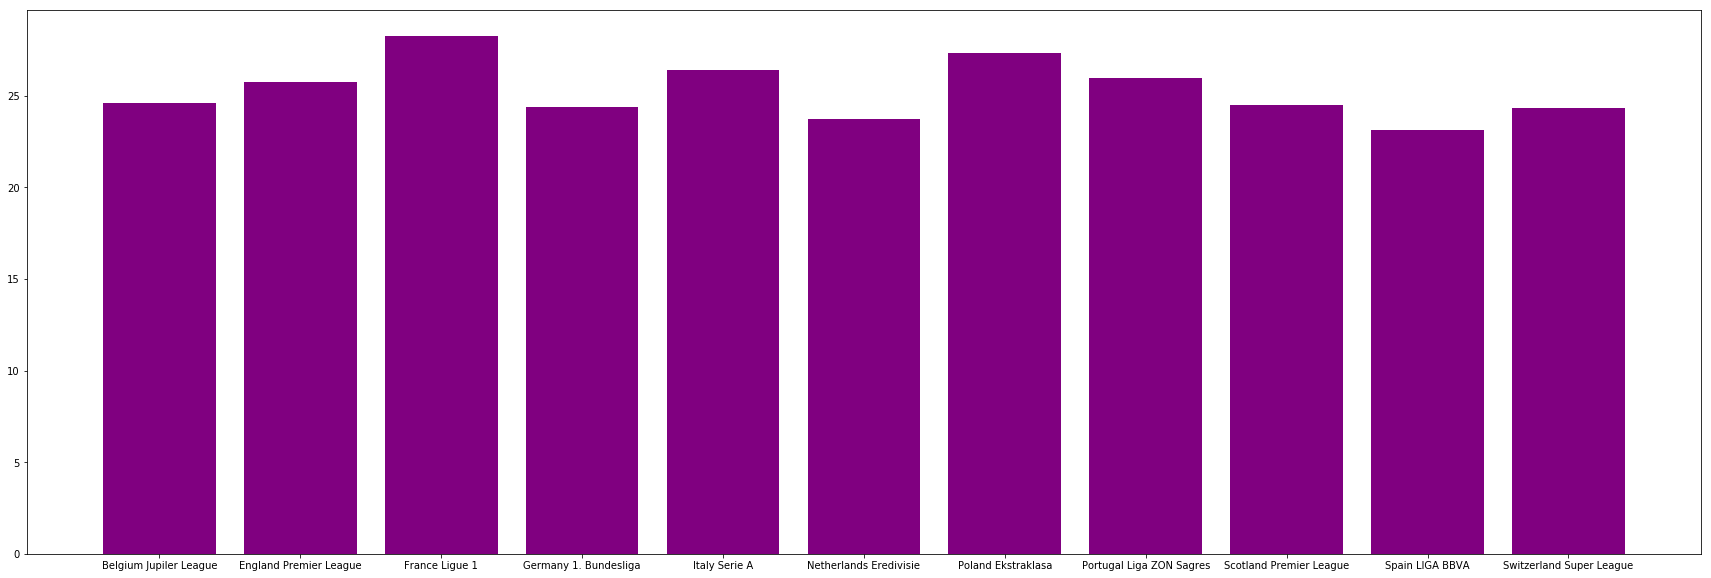

In [58]:
plt.figure(figsize=(30, 10)) #Setting the size of the plot
Leagues = result2.index #X-Axis
Draws = result2.values #Y-Axis
plt.bar(Leagues, Draws, color = "purple");

#### We can see that France league 1 has the highest draws percentage while Spain liga has the lowest one.

### Research Question 3  (How does scoring home goals correlate to the scoring of the away goals ?)

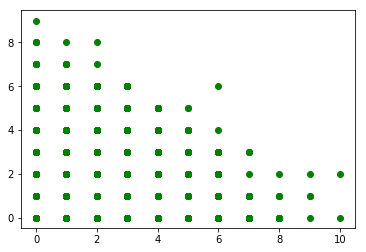

In [86]:
#X-axis ---> home team goals
#Y-axis ---> away team goals
plt.scatter(df_cleaned["home_team_goal"], df_cleaned["away_team_goal"], color ="green");

#### We can see that it is a negative correlation.

### Research Question 4 (Do home teams win more games than away teams?)

In [60]:
#Assigning the variables with their numbers:
home , draw , away = sum(df_cleaned["winner"] == "Home") , sum(df_cleaned["winner"] == "Draw") , sum(df_cleaned["winner"] == "Away")
print(f"Home wins: {home}") #Printing the home wins
print(f"Draws: {draw}") #Printing the draws
print(f"Away wins: {away}") #Printing the away wins

Home wins: 11917
Draws: 6596
Away wins: 7466


#### We can see that home teams win more games than away teams

### Research Question 5  (Do later season matches have more or less goals?)

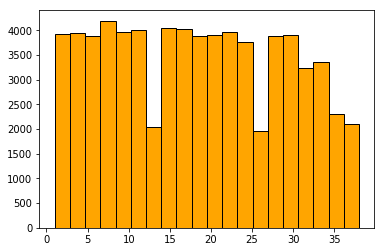

In [87]:
#X-axis ---> stage
#Y-axis ---> total goals
plt.hist(df_cleaned["stage"], bins=20, weights=df_cleaned["total_goals"] ,color = "orange" , edgecolor="black");

#### We can see that goals at the last stages of the season, the teams score less.

<a id='conclusions'></a>
## Conclusions of the research questions:
<ul>
    <li><h3>Research Question 1 (What is the league with the least and most total goals per match?)</h1>
        <h4>The league with the least goals indicates either the weakest attackers or strongest defenders and vice versa. So the league with the strogest defenders or weakest attackers is <u>Poland Ekstraklasa</u> while the team with the strongest attackers or weakest defenders is <u>Netherlands Eredivisie</u>. </h4>
    <li><h3>Research Question 2 (What is the league with the lowest and highest percentage of draws per game?)</h3>
        <h4>The league with the most draws indicates the league with the least excitement for fans and vice versa. So the Most exciting league for fans is <u>Spain liga</u> while the least is <u>France league 1</u>. </h4>
    <li><h3> Research Question 3 (How does scoring home goals correlate to the scoring of the away goals ?)</h3>
        <h4>The resulted correlation is negative. So as The home goals increase, the away goals decrease. This indicates that as the score gets higher, the away teams tend to give up.</h4>
    <li><h3> Research Question 4 (Do home teams win more games than away teams?)</h3>
        <h4>The result indicates that teams playing at their stadiums tend to have an advantage over the teams playing away. This result can be due to the presence of the home team supporters in larger quantities</h4>
    <li><h3> Research Question 5 (Do later season matches have more or less goals?)</h3>
        <h4>The result indicates that at the end of the season, the teams' managers take a more defensive approach as they want to not lose their current position and win without too much risk. </h4>
</ul>
<h2>Additional research could be made:</h2>
<ul>
    <li>FIFA rankings
    <li>Player statistics
    <li>Transfer data
</ul>

<h2> Limitations of the dataset:</h2>
<ul>
    <li><h3>The changes in managers not mentioned: </h3>
        New managers can either hinder the teams' preformance or make it better
    <li><h3>New transfers not mentioned</h3>
        New transfers can either hinder the teams' preformance or make it better
    <li><h3>Luck and playing style Not Measured	</h3>
        The team can win their games by skill and great performance or by luck
</ul>

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0